In [2]:
#importando dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import Image

In [3]:
# data_SRAG = pd.read_csv('data/SRAG-16-06-2020.csv', sep=';', error_bad_lines=False, encoding="utf-8",header=None,warn_bad_lines=False)
# data_SRAG = pd.read_excel('data/sraghosp_18.05.2020.xlsx')
data_mortalidade = pd.read_csv('data/data_mortalidade.csv')
pib = pd.read_csv('data/pib.csv')

In [4]:
# mapa = folium.Map([-23.223701, -45.85], zoom_start=12)
# mapa

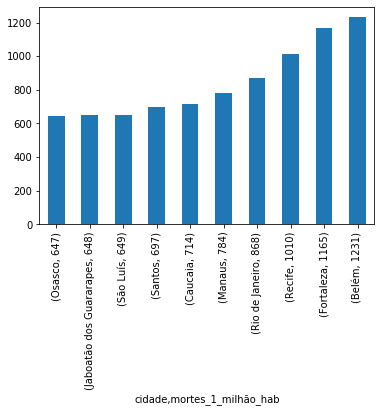

In [5]:
data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10).plot(kind='bar')
mortalidade_top = data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10)
# data_mortalidade
# data_SRAG.groupby('CO_MUN_NOT').size().sort_values().tail(10).plot(kind='barh')
# data_SRAG.groupby('SG_UF_NOT').size().sort_values().tail(10).plot(kind='barh')
# data_SRAG.values

In [6]:
# Gettin the top 10 mortality rank cities
top_cidades = data_mortalidade.groupby(["cidade","mortes_1_milhão_hab"])["mortes_1_milhão_hab"].mean().sort_values().tail(10).to_dict()
cidades = [cidade[0] for cidade in top_cidades.keys()]
cidades



['Osasco',
 'Jaboatão dos Guararapes',
 'São Luís',
 'Santos',
 'Caucaia',
 'Manaus',
 'Rio de Janeiro',
 'Recife',
 'Fortaleza',
 'Belém']

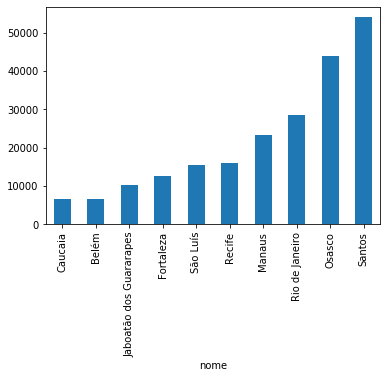

In [7]:
# pib[pib["nome"].isin(cidades)].groupby(["nome","PIB"])["PIB"].mean().sort_values().plot(kind='bar')
pib[pib["nome"].isin(cidades)].groupby(["nome"])["PIB_percapita"].mean().sort_values().plot(kind='bar')
pib = pib[pib["nome"].isin(cidades)].groupby(["nome"])["PIB_percapita"].mean().sort_values()

In [8]:
merge = pd.concat([pib.T,mortalidade_top.T], axis=0, ignore_index=False)
# merge.T
pib.T


nome
Caucaia                     6557.020020
Belém                       6607.559977
Jaboatão dos Guararapes    10279.049805
Fortaleza                  12687.500000
São Luís                   15381.990234
Recife                     15903.179688
Manaus                     23286.060547
Rio de Janeiro             28405.949219
Osasco                     43994.468750
Santos                     54054.761719
Name: PIB_percapita, dtype: float64

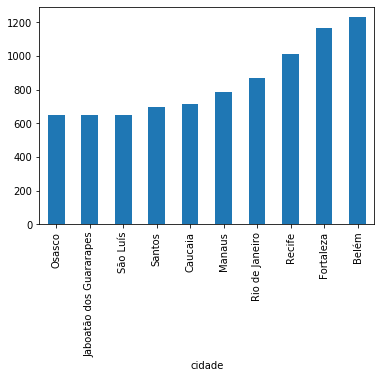

In [9]:
data_mortalidade[data_mortalidade["cidade"].isin(cidades)].groupby(["cidade"])["mortes_1_milhão_hab"].mean().sort_values().plot(kind='bar')
mortalidade_top = data_mortalidade[data_mortalidade["cidade"].isin(cidades)].groupby(["cidade"])["mortes_1_milhão_hab"].mean().sort_values()
# mortalidade_top.T

<BarContainer object of 10 artists>

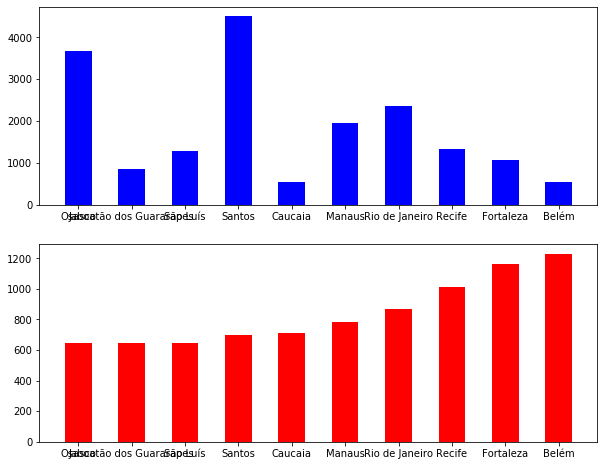

In [41]:
# mortalidade_top.T
# pib.T
result = pd.concat([mortalidade_top,pib], axis=1).reindex(mortalidade_top.index)
# result.groupby(["cidade","mortes_1_milhão_hab"])["PIB_percapita"].mean().sort_values().plot(kind='barh')
# result.index
# plt.subplots_adjust(top=2, bottom=0.01, left=2, right=5, hspace=0.10,wspace=0.10)
fig, axs = plt.subplots(2,1,figsize=(10,8))

#Criando o grafico
axs[0].bar(result.index,[x/12 for x in result['PIB_percapita']],facecolor="b",width=.5)
axs[1].bar(result.index,result['mortes_1_milhão_hab'],facecolor="r",width=.5)

#Exibindo o grafico
# plt.show()